<div style="border:solid Chocolate 2px; padding: 40px">

Привет, Ольга! Меня зовут Александр Куимов. Я буду ревьюером твоего проекта. Ты можешь обращаться ко мне на "ты"😏 Надеюсь, тебя также не смутит, если я буду обращаться к тебе на "ты", но если это неудобно, обязательно скажи об этом!

Пожалуйста, не удаляй мои комментарии, они будут особенно полезны для нашей работы в случае повторной проверки проекта. 

Ты также можешь реагировать на мои комментарии своими по шаблону, показанному чуть ниже. Это нужно, чтобы не создавалась путаница😉

Ты можешь найти мои комментарии, обозначенные <font color='green'>зеленым</font>, <font color='gold'>желтым</font> и <font color='red'>красным</font> цветами, например:

<br/>

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> В случае, если решение на отдельном шаге является полностью правильным.
</div>

<br/>

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> В случае, когда решение на отдельном шаге станет еще лучше, если внести небольшие коррективы.
</div>


<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку🤔:</b>
 В случае, когда решение на отдельном шаге требует существенной переработки и внесения правок. Напоминаю, что проект не может быть принят с первого раза, если ревью содержит комментарии, рекомендующие доработать шаги.
</div>
    
    
<br/>    
<div class="alert alert-info">
<h2> Комментарий студента: <a class="tocSkip"> </h2>

<b>👋:</b> В такой цветовой ячейке я прошу тебя оставлять свои комментарии. Если исправляешь проект на второй итерации и выше, не забывай пожалуйста указывать номер итерации, например, "Комментарий студента v.2".
</div> 

<br/>    
    
Увидев у тебя неточность, в первый раз я лишь укажу на ее наличие и дам тебе возможность самому найти и исправить ее. На реальной работе твой руководитель будет поступать также, и я пытаюсь подготовить тебя именно к работе датасаентистом. Но если ты пока не справишься с такой задачей - при следующей проверке я дам более точную подсказку!🤓

# Исследовательский анализ данных

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b>  
    
Я бы посоветовал тебе подробнее раскрыть план своей работы. Это поможет тебе расставлять акценты в выводах.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, BatchNormalization, Activation, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50

In [2]:
labels = pd.read_csv('/datasets/faces/labels.csv')
train_datagen = ImageDataGenerator(rescale=1./255)
train_gen_flow = train_datagen.flow_from_dataframe(
        dataframe=labels,
        directory='/datasets/faces/final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        seed=12345) 

Found 7591 validated image filenames.


<div style="border:solid Chocolate 2px; padding: 40px">


<h2> Итоговый комментарий ревьюера v.0 <a class="tocSkip"> </h2>    

Некоторые блоки кода не работают. Посмотри, пожалуйста, что пошло не так. Перед отправкой проекта стоит проверять работоспособность кода - это можно сделать, нажав на панели `Jupiter Hub Kernel` и `Restart & Run All`
      
    
Жду от тебя новую версию проекта.    

<font color='purple'><b>Комментарий студента: зивините, я запуталась какой куда код нужен. Сейчас сделала в тренажере, в нем работает.</b></font>

<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>
    
<b>На доработку🤔:</b> Понял тебя
    
Размер выборки выведен. Тут еще следует добавить вывод, маленькая ли она? Возможно, стоит добавить, как этот размер скажется на обучении модели. К примеру, в Imagenet у нас 14 197 122 изображения

In [3]:
labels.shape

(7591, 2)

In [4]:
labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7591 entries, 0 to 7590
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_name  7591 non-null   object
 1   real_age   7591 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 118.7+ KB


In [5]:
labels.isna().sum()

file_name    0
real_age     0
dtype: int64

<b>Данные полные, нет пропусков.<b/>

In [6]:
labels.describe()

,real_age
count,7591.000000
mean,31.201159
std,17.145060
min,1.000000
25%,20.000000
50%,29.000000
75%,41.000000
max,100.000000


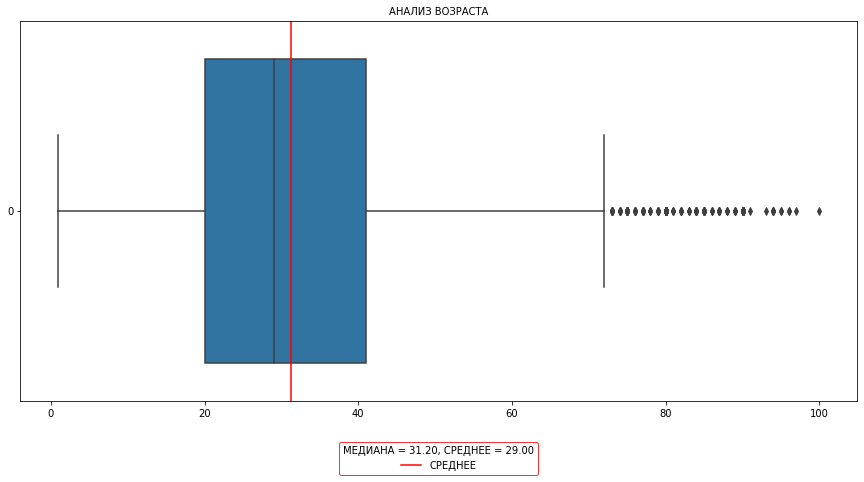

In [7]:
plt.figure(figsize=[15, 7])
plt.title(f'АНАЛИЗ ВОЗРАСТА', fontsize=10)
sns.boxplot(data=labels['real_age'], orient='h')
plt.axvline(np.mean(labels['real_age']), 
            color='r', 
            linestyle='-',
            label='СРЕДНЕЕ')
median = np.mean(labels['real_age'])
mean = np.median(labels['real_age'])
plt.legend(title=f'МЕДИАНА = {median:.2f}, СРЕДНЕЕ = {mean:.2f}', 
           loc='center', 
           edgecolor = 'r',          
           bbox_to_anchor=(0.5, -0.15));

 <br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>
    
<b>На доработку🤔:</b>

</b> Ячейка выше не отработала. Перед отправкой проекта стоит проверять работоспособность кода - это можно сделать, нажав на панели Jupiter Hub `Kernel` и `Restart & Run All`. Исправь, пожалуйста.

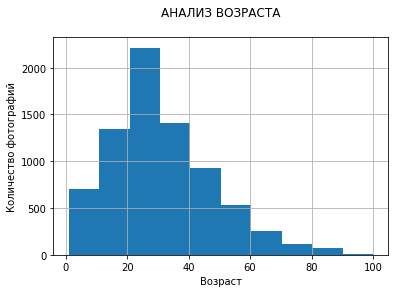

In [10]:
labels['real_age'].plot(kind='hist')
plt.grid(True)
plt.title('АНАЛИЗ ВОЗРАСТА'+ "\n")
plt.xlabel('Возраст')
plt.ylabel('Количество фотографий');

<b>В датасете преобладают данные о внешности людей от 5 до 45 лет, и очень мало данных на людей в возрасте более 80 лет. Такое неравномерное распределение данных может негативно сказаться на обучении.<b/>

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b>  
    
Гистограмма целевого признака выведена. Раз у нас 100 различных возрастов, то и корзин можно указать столько же.
        
Так ты увидишь пики в районе "юбилейных" лет, они тут могут быть связаны с тем, что настоящий возраст был неизвестен тому, кто размечал датасет, и он попросту округлял его. Поэтому, некоторые "круглые" года в датасете некорректные. 

<b>Разделю датасет на признаки и целевые признаки и посмотрю на размер признаков.<b/>

In [11]:
features, target = next(train_gen_flow)
features.shape

(32, 224, 224, 3)

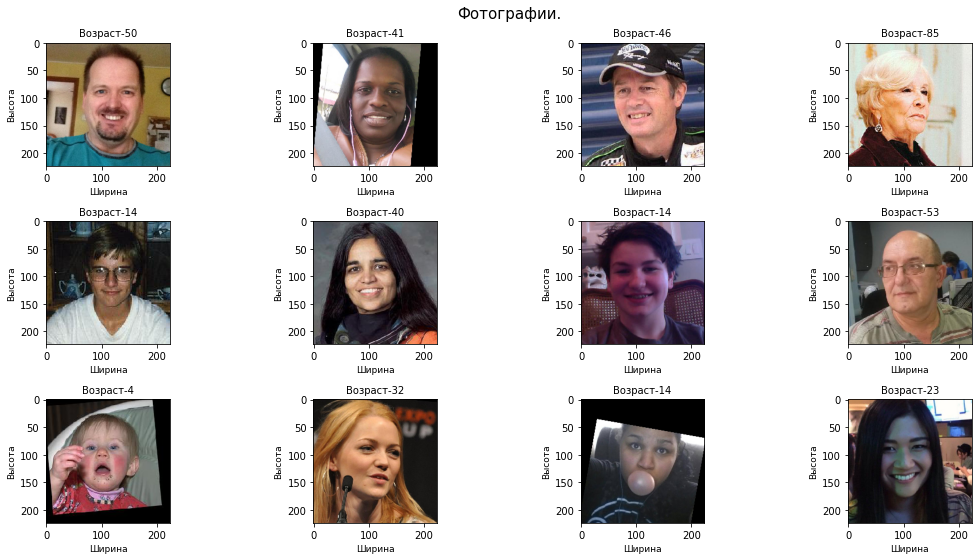

In [12]:
fig = plt.figure(figsize=(15,10))
plt.subplots_adjust(top=0.90, wspace=0.3, hspace=0.95)
for i in range(12):
    plt.suptitle('Фотографии.', fontsize=15)
    fig.add_subplot(4,4, i+1)
    plt.title(f'Возраст-{target[i]}', fontsize=10)
    plt.imshow(features[i])
    plt.grid(False)
    plt.ylabel('Высота', fontsize=9)
    plt.xlabel('Ширина', fontsize=9)
plt.tight_layout()

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>
    
Примеры фотографий выведены!

<b>Я выгрузила 12 фотографий, присутвуют и цветные и черно-белые фото в разных ракурсах.<b/>

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b>
    

        
Добавлю, общая ориентация фотографий примерно одинакова - в некоторых фото их уже повернули за нас, чтобы выровнять положение лица, значит нам их не обязательно поворачивать, а начальный размер изображений отличается, в силу того, что визуально заметно различное качество фото, где-то есть черные рамки (они не несут полезной информации). В итоге, размер изображений мы приведем к единому перед обучением модели.
        
Советую изучить базовые возможности аугментаций в <a href="https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator">документации</a> или в <a href="https://towardsdatascience.com/machinex-image-data-augmentation-using-keras-b459ef87cd22">статье</a>.         
 </div>

# Обучение модели

def load_train(path):
 
    labels = pd.read_csv(path + 'labels.csv')
    images_dir = path + '/final_files'
 
    data_gen = ImageDataGenerator(rescale=1/255.,
                                  validation_split=0.25,
                                  horizontal_flip=True,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2)
 
    data_gen_flow = data_gen.flow_from_dataframe(dataframe=labels, directory=images_dir,
                                                x_col='file_name', y_col='real_age',
                                                target_size=(256,256), batch_size=32,
                                                class_mode='raw', seed=1337, subset='training')
 
    return data_gen_flow

def load_test(path):
    labels_test = pd.read_csv(path+'labels.csv')
    test_datagen = ImageDataGenerator(rescale=1/255., validation_split=0.25)
    
    test_datagen_flow = test_datagen.flow_from_dataframe(dataframe=labels_test, directory=path+'/final_files',
                                                         x_col='file_name', y_col='real_age',
                                                         target_size=(224,224), batch_size=32,
                                                         class_mode='raw', subset='validation', seed = 12345)
    
    return test_datagen_flow

def create_model(input_shape):
    
    backbone = ResNet50(input_shape=input_shape, 
                        weights='imagenet',
                        include_top=False)
    
    optimizer = Adam(lr=0.0001)
    
    model = Sequential()
    model.add(backbone)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(12, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='relu'))
    
    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])

    return model 

def train_model(model, train_data, test_data, batch_size=None, epochs=10, steps_per_epoch=None, validation_steps=None):
    
    if steps_per_epoch is None:
        steps_per_epoch = len(train_data)
    if validation_steps is None:
        validation_steps = len(test_data)
   
    model.fit(train_data,
              validation_data=test_data,
              batch_size=batch_size, 
              epochs=epochs,
              steps_per_epoch=steps_per_epoch,
              validation_steps=validation_steps,
              verbose=2, shuffle=True)
    
    return model

<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку🤔:</b>

В настройках обоих загрузчиков следует указать одинаковый seed. Так не будет пересечения выборок. И в настройках обоих загрузчиков следует указать одинаковый target_size=(224,224)

# Анализ модели

Train for 178 steps, validate for 60 steps

Epoch 1/10

2023-01-26 06:38:41.981073: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
                
2023-01-26 06:38:44.450673: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudnn.so.7
                
178/178 - 107s - loss: 340.5456 - mae: 13.8125 - val_loss: 595.8442 - val_mae: 19.3706
                
Epoch 2/10
178/178 - 42s - loss: 175.9893 - mae: 9.9075 - val_loss: 509.3471 - val_mae: 17.3867
                
Epoch 3/10
178/178 - 44s - loss: 154.0240 - mae: 9.3291 - val_loss: 498.0192 - val_mae: 17.3014
                
Epoch 4/10
178/178 - 43s - loss: 138.5690 - mae: 8.7039 - val_loss: 227.0065 - val_mae: 11.6301
                
Epoch 5/10
178/178 - 45s - loss: 132.1986 - mae: 8.4737 - val_loss: 108.0098 - val_mae: 8.0252
                
Epoch 6/10
178/178 - 44s - loss: 124.0982 - mae: 8.1729 - val_loss: 85.6524 - val_mae: 6.9848
                
Epoch 7/10
178/178 - 43s - loss: 118.2830 - mae: 7.9813 - val_loss: 82.7947 - val_mae: 6.8641
                
Epoch 8/10
178/178 - 42s - loss: 111.9620 - mae: 7.7568 - val_loss: 111.2957 - val_mae: 7.8518
                
Epoch 9/10
178/178 - 44s - loss: 108.9449 - mae: 7.6412 - val_loss: 91.4284 - val_mae: 7.2961
                
Epoch 10/10
178/178 - 43s - loss: 108.8692 - mae: 7.6782 - val_loss: 80.1729 - val_mae: 6.7813
                

                
60/60 - 10s - loss: 80.1729 - mae: 6.7813
Test MAE: 6.7813

<b>В результате обучения модели ResNet50 с весами weights='imagenet' и использованием алгоритма Adam с параметром lr = 0.0001 были получены резултаты MAE ниже 8, а именно 6,78. Параментр lr определяет скорость обучения, чем ниже скорость обучения(шаг градиентного спуска), тем лучше подбираются параметры для нейронов.</b>

<b>Считаю, что полученная модель позволит эффективно решить поставленные бизнесом задачи.</b>

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 

Не думаю, что модель с такой погрешностью  сможет помочь в определении возраста покупателя для продажи алкоголя.

      

<div style="border:solid Chocolate 2px; padding: 40px">


<h2> Итоговый комментарий ревьюера v.1 <a class="tocSkip"> </h2>    
    
  
У меня сложилось хорошее общее впечатление о проекте, тебе удалось неплохо справиться с проектом. Молодец! Загружены данные для анализа, изучен каждый параметр, модель построена и протестирована. Тебе удалось успешно справиться с первой задачей в области компьютерного зрения. Поздравляю!
    
Отмечу отдельные положительные моменты проекта🙂:
    
- радует, что проект хорошо структурирован, приятно проверять такие работы;
- есть красивые визуализации в проекте.
    
Есть несколько моментов всего, на которые стоит ещё раз взглянуть, я указал их в моих комментариях по ходу проекта. Предлагаю тебе доработать проект по моим комментариям, чтобы довести его до совершенства.

    
Если будут вопросы, обращайся, с удовольствием на них отвечу.  
</div>